In [1]:
# to access functions from other locations
import sys
sys.path.append('/data/ad181/RemoteDir/k_variability_in_ressim_env/SPE10_like_envs/')

In [2]:
%matplotlib notebook
import numpy as np 
import matplotlib.pyplot as plt  
from itertools import product
from tqdm.notebook import trange
import functools
from time import time, sleep

from ressim_env import ResSimEnv_v0
from model.ressim import Grid
from k_distributions.generate_constr_k import generate_cond_, generate
from utils.env_evaluate_functions import eval_actions
from utils.plot_functions import plot_s_animation, plot_k_array, plot_k

# Select a prior GP with corr_l, sigma that matches SPE10 (tarbert) like permeability

In [3]:
seed=1

## Reference permeability SPE10 - Tarbert

(220, 60)


<IPython.core.display.Javascript object>


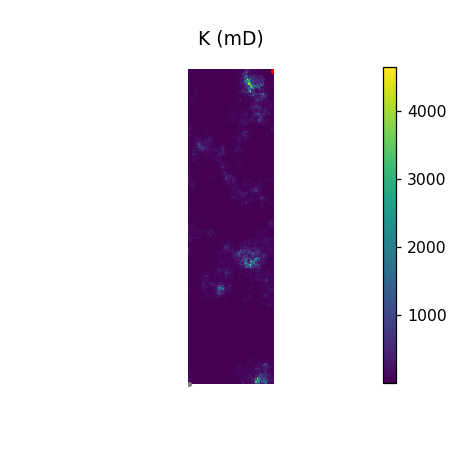

<IPython.core.display.Javascript object>


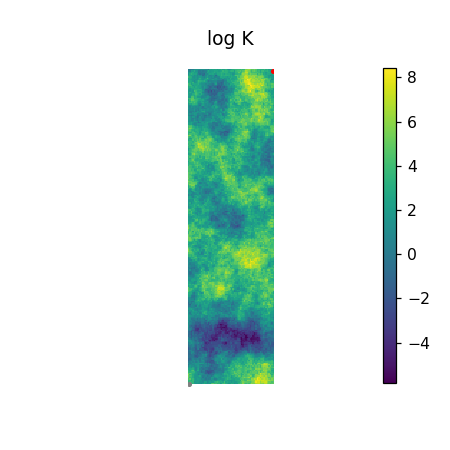

In [4]:
# plot tarbert log-k plot
case='tarbert'

# domain properties
nx = 60
ny = 220
lx = 60*0.3048*20
ly = 220*0.3048*10
grid = Grid(nx=nx, ny=ny, lx=lx, ly=ly)

# initial conditions
Q = 795./85  # total injection
q = np.zeros(grid.shape)
q[0,0] = Q
q[-1,-1] = -Q
k = np.loadtxt(f'../spe10_ref_case/spe10_data/{case}_perm.csv', delimiter=',') 

print(k.shape)
m2_md_conv = 1.01325e+15
k = m2_md_conv*k
fig = plot_k(k, q, title='K (mD)')
fig = plot_k(np.log(k), q, title='log K')

## Reference permeability SPE10 - Upperness

(220, 60)


<IPython.core.display.Javascript object>


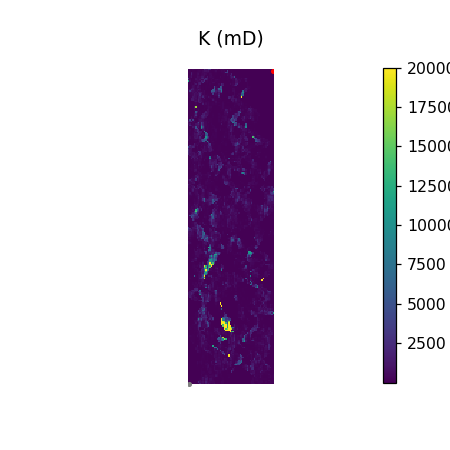

<IPython.core.display.Javascript object>


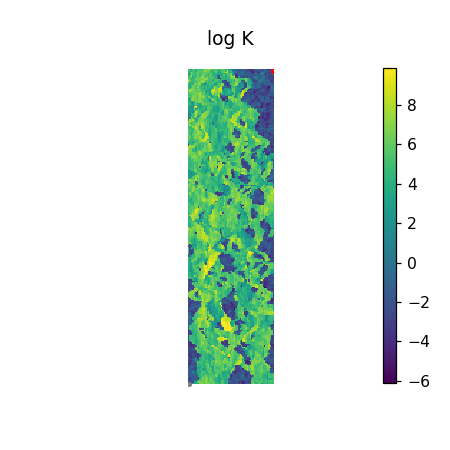

In [5]:
# plot tarbert log-k plot
case='upperness'

# domain properties
nx = 60
ny = 220
lx = 60*0.3048*20
ly = 220*0.3048*10
grid = Grid(nx=nx, ny=ny, lx=lx, ly=ly)

# initial conditions
Q = 795./85  # total injection
q = np.zeros(grid.shape)
q[0,0] = Q
q[-1,-1] = -Q
k = np.loadtxt(f'../spe10_ref_case/spe10_data/{case}_perm.csv', delimiter=',') 

print(k.shape)
m2_md_conv = 1.01325e+15
k = m2_md_conv*k
fig = plot_k(k, q, title='K (mD)')
fig = plot_k(np.log(k), q, title='log K')

## Select GP prior (unconditional k )

In [6]:
# # domain properties
# nx = 33
# ny = 49
# lx = 1  #1200*0.3048 # 1200 ft
# ly = 1.5 # 1800*0.3048 # 1800 ft
# grid = Grid(nx=nx, ny=ny, lx=lx, ly=ly)

# phi = 0.2*np.ones(grid.shape)
# s_wir = 0.2
# s_oir = 0.2

# # time steps
# dt = 1
# nstep = 25
# terminal_step= 5 # total: 125 days

# # initial conditions
# ooip = grid.lx * grid.ly * phi[0,0] * (1 - s_wir - s_oir) # original oil in place
# total_time = nstep*terminal_step*dt
# fraction = 1.0
# Q = fraction*ooip/total_time 
# q = np.zeros(grid.shape)
# q[::16,0] = -Q/12
# q[::16,-1] = -Q/12
# q[::16,16] = -Q/12
# q[8::16,8] = Q/6
# q[8::16,24] = Q/6
# s = np.ones(grid.shape)*s_wir

# # permeability
# cond_idx = np.where(np.abs(q.flatten()) > 0.0)
# log_values_ = np.zeros_like(cond_idx)

# hx, hy = lx/nx, ly/ny

# log_k_prior = generate(nx=grid.nx, ny=grid.ny, lx=grid.lx, ly=grid.ly, 
#                        length=0.3*grid.ly, sigma=3.0, 
#                        sample_size=9, seed=1)

# for log_k in log_k_prior:
#     fig = plot_k(log_k, q, title='log K prior')

# # k_train = generate_cond_(nx=grid.nx, ny=grid.ny, lx=grid.lx, ly=grid.ly, 
# #                         length=0.4*grid.ly, sigma=3.0,log_values=log_values_, sigma_error= 0.05, cond_idx=cond_idx, sample_size=9, seed=seed)

In [7]:
# fig = plot_k_array(k_train, q)

In [8]:
# print(k_train[0].flatten()[cond_idx])

In [9]:
# scale = 0.82e-14 # manipulation for SPE 10 like permeability (0-4700 mD smooth - tarbert)
# k_train = scale*np.exp(k_train) 

# m2_md_conv = 1.01325e+15
# k_max, k_min = m2_md_conv*k_train.max(), m2_md_conv*k_train.min()
# print(f'k_max:{round(k_max)} mD , k_min:{round(k_min)} mD')

# Environment 

In [10]:
# # Environments with constant permeability
# index = 8 # from [0,1,...,8]
# env = ResSimEnv_v0(grid, np.array([k_train[index]]), phi, s_wir, s_oir,  # domain properties
#                    mu_w, mu_o, mobility,                                 # fluid properties
#                    dt, nstep, terminal_step,                             # timesteps
#                    q, s) 

# Simulation

In [11]:
# actions_base = np.array([ -q[q<0] for _ in range(terminal_step) ])
# actions_base = actions_base.reshape(terminal_step, -1)
# before = time()
# states, actions, rewards = eval_actions(env, actions_base)
# print(f'simulation time: {round(time()-before)} seconds')
# fig = plot_s_animation(states, actions, rewards, s_min=0.2, s_max=0.8) # visualization
# # fig.show()